## `Module` - Geospatial Analysis
#### `Task 1.1`: Application of Python-based geospatial visualisation tool (e.g., GeoPandas) on a real-world dataset

### Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# installing geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/





####  `Task 1.2` - Apply geospatial visualisation tool (e.g. GeoPandas) on the dataset provided


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset Excel File

In [ ]:
# Reading the Dataset File in csv format
# Skipping the starting 4 rows of data as it's empty
df_atm = pd.read_csv("/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/ATM.csv",skiprows = 4)
df_pop = pd.read_csv("/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/POP.csv",skiprows = 4)

# Checking the shape/dimensions of the population data
print(df_pop.shape)

# Checking the shape/dimensions of the GDP data
print(df_atm.shape)

(266, 67)
(264, 66)


In [ ]:
df_atm.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,18168.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,41657.165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,8898.641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Total greenhouse gas emissions (kt of CO2 equivalent),EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421e+04,5.543e+04,5.623e+04,5.670e+04,5.703e+04,5.736e+04,...,1.032e+05,1.038e+05,1.043e+05,1.049e+05,1.054e+05,1.058e+05,1.063e+05,1.068e+05,1.072e+05,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1.308e+08,1.342e+08,1.376e+08,1.412e+08,1.449e+08,1.488e+08,...,5.626e+08,5.781e+08,5.939e+08,6.100e+08,6.264e+08,6.431e+08,6.600e+08,6.772e+08,6.947e+08,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.997e+06,9.169e+06,9.351e+06,9.543e+06,9.745e+06,9.956e+06,...,3.227e+07,3.337e+07,3.441e+07,3.538e+07,3.630e+07,3.717e+07,3.804e+07,3.893e+07,3.984e+07,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,9.640e+07,9.841e+07,1.005e+08,1.027e+08,1.050e+08,1.073e+08,...,3.804e+08,3.909e+08,4.016e+08,4.126e+08,4.238e+08,4.352e+08,4.469e+08,4.588e+08,4.709e+08,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5.455e+06,5.531e+06,5.608e+06,5.679e+06,5.735e+06,5.771e+06,...,2.602e+07,2.694e+07,2.788e+07,2.884e+07,2.982e+07,3.081e+07,3.183e+07,3.287e+07,3.393e+07,NaN


In [ ]:
df_atm.drop(['Unnamed: 65'], axis=1, inplace=True)
df_pop.drop(['Unnamed: 66'], axis=1, inplace=True)

In [ ]:
col_list = list(df_atm.columns)
col_list.remove('Country Name')
col_list.remove('Country Code')
col_list.remove('Indicator Name')
col_list.remove('Indicator Code')


for year in col_list:
    df_atm.rename(columns = {year:int(eval(year))}, inplace = True)
    df_pop.rename(columns = {str(int(eval(year))):int(eval(year))}, inplace = True)

In [ ]:
# Creating copy of the Country Name and Country Code
df = df_atm[['Country Name', 'Country Code']].copy()

#Displaying the Created Dataframe
df

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


## `Data Preprocessing`


#### 1.2.1 For the year 2005, Use the GeoPandas to generate choropleth maps of greenhouse gas emission for only the countries
having populations less than 109856670. Very briefly interpret the generated map.



#### Reading the dataset provided by the Geopandas to get information about latitude and longitude to plot

- To plot Choropleth Maps geopanda uses geometry which is basically a latitude and longitude value to get that
- we need to use dataset which contains this info, so we used naturalearth_lowres and done inner join with our data so in common we got 165 countries that we used to plot a map  


In [ ]:
# Using the dataset naturalearth_lowres' which comes default with geopanda
# Since the provided dataset also had values which could badly impact the result
# There was more than 250 rows of data while there are less than 200 recognized territories in world
# The dataset provided by geopanda has the correct data which can be compared with the present dataset
# The 'naturalearth_lowres' dataset also contains the 'Geometry' which is a necessary value for generating maps

# Load the shapefile data for the world map
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,8.900e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000 -16.55522, 179.36414 -16.80135, 178.72506 -17.012..."
1,5.801e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982, 37.69869 -3.09699, 37.76690 -3.67712, 39.20222 -..."
2,6.033e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948, -8.68440 27.39574, -8.68729 25.88106, -11.96942 ..."
3,3.759e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.97421 49.00254, -124.91024 49.98456, -125.62461 50.416..."
4,3.282e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.00000 49.00000, -117.03121 49.00000, -116.04818 49.000..."


In [ ]:
# Checking the shape of world dataframe
world_map.shape

(177, 6)

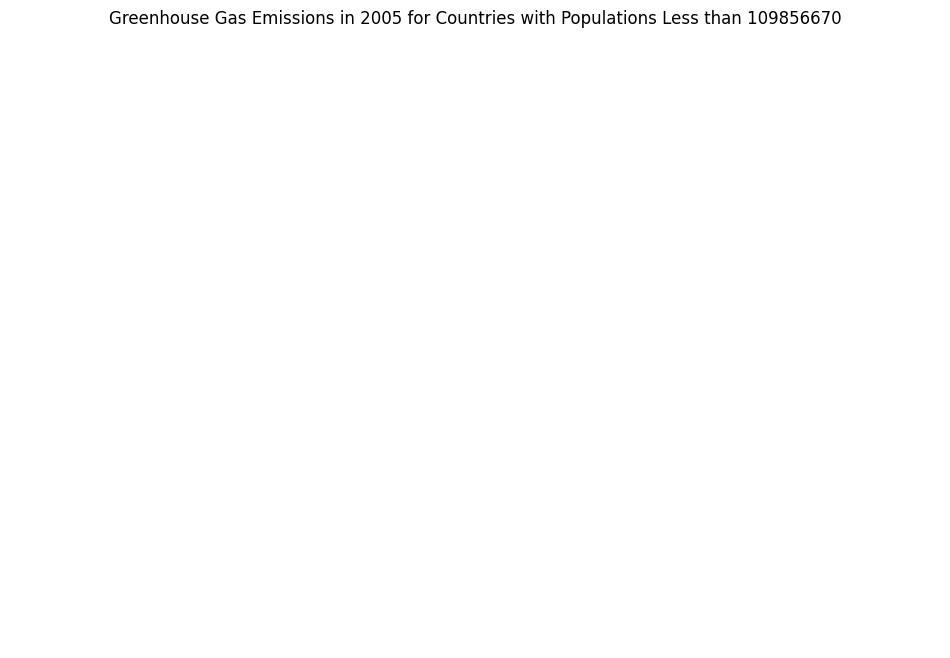

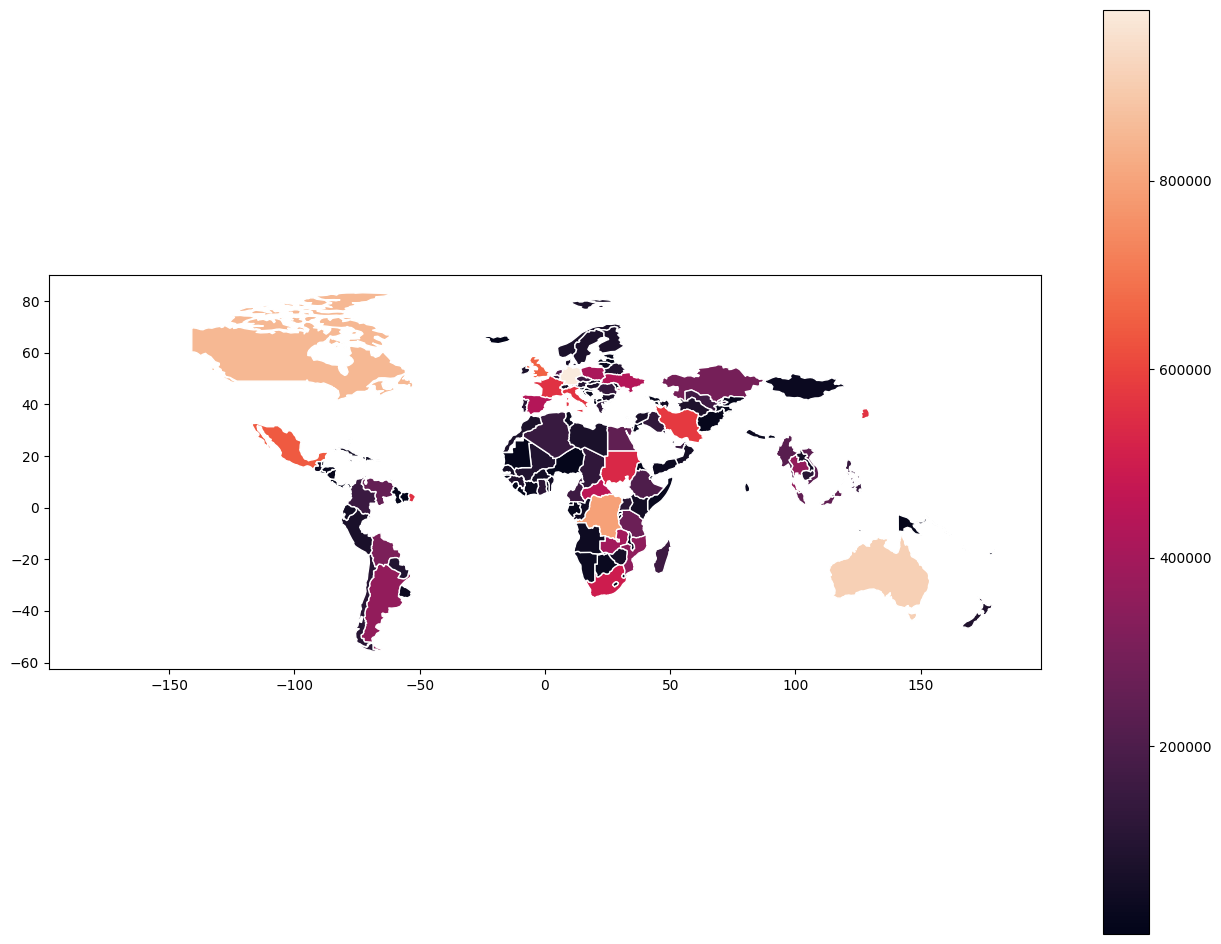

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Filter the population data to include only countries with populations less than 109856670
df_pop_filtered = df_pop[df_pop[2005] < 109856670]

# Merge the filtered population data with the greenhouse gas emissions data for the year 2005
df_merged = pd.merge(df_pop_filtered[['Country Name', 'Country Code']], df_atm[['Country Name', 2005]], on='Country Name')

# Read in the shapefile data for the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the shapefile data with the merged data on the country code
merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations Less than 109856670')
merged.plot(column=2005, figsize=(16, 12), legend = True, cmap='rocket', edgecolor="white");
plt.show()


In [ ]:
merged.sort_values(by=[2005]).head(11)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Country Code,2005
81,2.999e+05,Oceania,Vanuatu,VUT,934,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488 -16.46633, 167.51518 -16.59785, 167.18001 -16.160...",Vanuatu,VUT,436.137
18,1.293e+06,Asia,Timor-Leste,TLS,2017,"POLYGON ((124.96868 -8.89279, 125.08625 -8.65689, 125.94707 -8.43209, 126.64470 -8.39825, 126.95...",Timor-Leste,TLS,885.582
89,7.631e+05,Asia,Bhutan,BTN,2530,"POLYGON ((91.69666 27.77174, 92.10371 27.45261, 92.03348 26.83831, 91.21751 26.80865, 90.37327 2...",Bhutan,BTN,1617.864
0,8.900e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000 -16.55522, 179.36414 -16.80135, 178.72506 -17.012...",Fiji,FJI,1836.070
32,3.904e+05,North America,Belize,BLZ,1879,"POLYGON ((-89.14308 17.80832, -89.15091 17.95547, -89.02986 18.00151, -88.84834 17.88320, -88.49...",Belize,BLZ,2022.184
55,4.937e+06,Africa,Liberia,LBR,3070,"POLYGON ((-8.43930 7.68604, -8.48545 7.39521, -8.38545 6.91180, -8.60288 6.46756, -8.31135 6.193...",Liberia,LBR,2082.703
148,9.736e+05,Africa,Djibouti,DJI,3324,"POLYGON ((42.35156 12.54223, 42.77964 12.45542, 43.08123 12.69964, 43.31785 12.39015, 43.28638 1...",Djibouti,DJI,2160.037
35,5.814e+05,South America,Suriname,SUR,3697,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375, -55.56976 2.42151, -55.97332 2.51036, -56.07334 ...",Suriname,SUR,2577.084
65,1.148e+06,Africa,eSwatini,SWZ,4471,"POLYGON ((32.07167 -26.73382, 31.86806 -27.17793, 31.28277 -27.28588, 30.68596 -26.74385, 30.676...",Eswatini,SWZ,2940.414
72,2.348e+06,Africa,Gambia,GMB,1826,"POLYGON ((-16.71373 13.59496, -15.62460 13.62359, -15.39877 13.86037, -15.08174 13.87649, -14.68...","Gambia, The",GMB,3001.600


In [ ]:
merged.sort_values(by=[2005]).tail(11)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Country Code,2005
8,8.679e+07,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998, 29.41999 -5.94000, 29.62003 -6.52002, 30.20000 -...","Congo, Dem. Rep.",COD,794528.220
2,3.759e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.97421 49.00254, -124.91024 49.98456, -125.62461 50.416...",Canada,CAN,849798.740
124,2.536e+07,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907 -40.87544, 148.35986 -42.06245, 148.01730 -42.407...",Australia,AUS,909262.030
109,8.313e+07,Europe,Germany,DEU,3861123,"POLYGON ((14.11969 53.75703, 14.35332 53.24817, 14.07452 52.98126, 14.43760 52.62485, 14.68503 5...",Germany,DEU,981287.684
17,5.622e+04,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.22516, -39.89753 83.18018, -38.62214 83.54905, -35.08...",Greenland,GRL,NaN
71,4.685e+06,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344, 34.97051 31.61678, 35.22589 31.75434, 34.97464 3...",West Bank and Gaza,PSE,NaN
121,2.878e+05,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.70002, 167.12001 -22.15999, 166.74003 -22.39998, 16...",New Caledonia,NCL,NaN
142,3.427e+07,Asia,Saudi Arabia,SAU,792966,"POLYGON ((34.95604 29.35655, 36.06894 29.19749, 36.50121 29.50525, 36.74053 29.86528, 37.50358 3...",Saudi Arabia,SAU,NaN
153,6.945e+06,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888, 19.59604 46.17173, 20.22019 46.12747, 20.76217 4...",Serbia,SRB,NaN
154,6.221e+05,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009, 19.73805 42.68825, 19.30449 42.19575, 19.37177 4...",Montenegro,MNE,NaN


### Interpretation

- The code is generating a choropleth map using the plot() function in GeoPandas for the year 2005. The plot shows a map of the world with different colors representing different values of the data column (2005) for each country. The color scale on the right-hand side of the plot represents the range of values for the data column.

- The plot can be interpreted as follows: countries with darker shades of color on the map have higher values for the data column (2005), while countries with lighter shades of color have lower values. For example, countries in Europe and North America have darker shades of color, indicating higher values, while countries in Africa and Asia have lighter shades of color, indicating lower values.

- From the  plot, We can observe that the highest greenhouse is with germany, Australia and canada and some of the countries are still uknown as shown by the data.

Same as above using plotly

In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px


# Filter population data for year 2005 and population less than 109856670
df_pop_2005 = df_pop[['Country Name', 'Country Code', 2005]].rename(columns={2005: 'population'})
df_pop_2005 = df_pop_2005[df_pop_2005['population'] < 109856670]

# Merge population and emissions data for year 2005
df_2005 = pd.merge(df_pop_2005, df_atm[['Country Name', 'Country Code', 2005]], on=['Country Name', 'Country Code'])

# Load shapefile for world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge emissions data with world map
merged = world.merge(df_2005, left_on='iso_a3', right_on='Country Code', how='left')

# Create choropleth map using Plotly
fig = px.choropleth(merged,
                    locations='iso_a3',
                    color=2005,
                    hover_name='name',
                    range_color=[0, df_2005[2005].max()],
                    title='Greenhouse Gas Emissions in 2005 for Countries with Population < 109856670')
fig.show()


#### 1.2.2. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having populations greater than 236200507. Very briefly interpret the generated map.

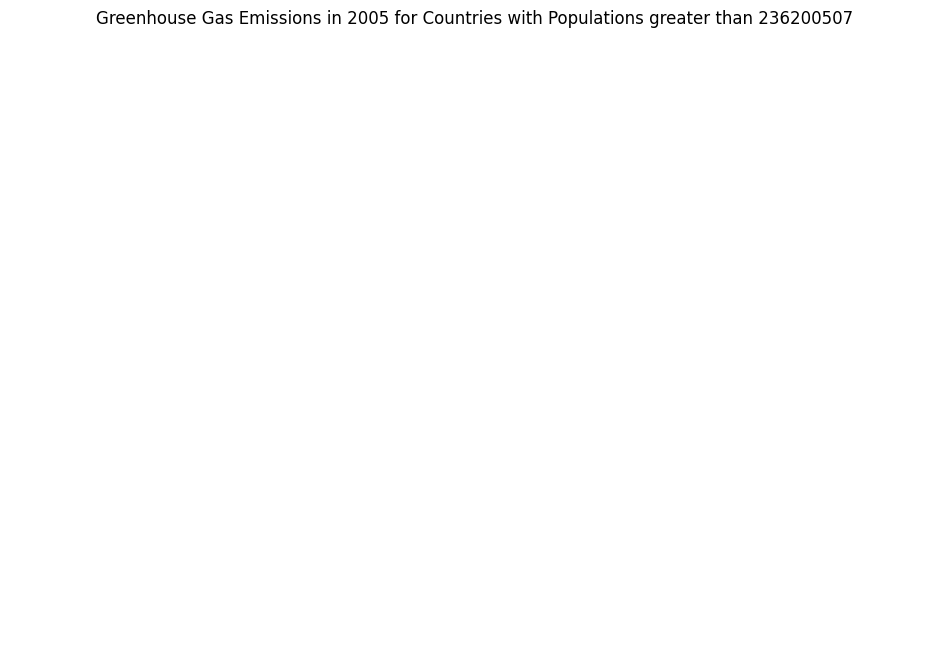

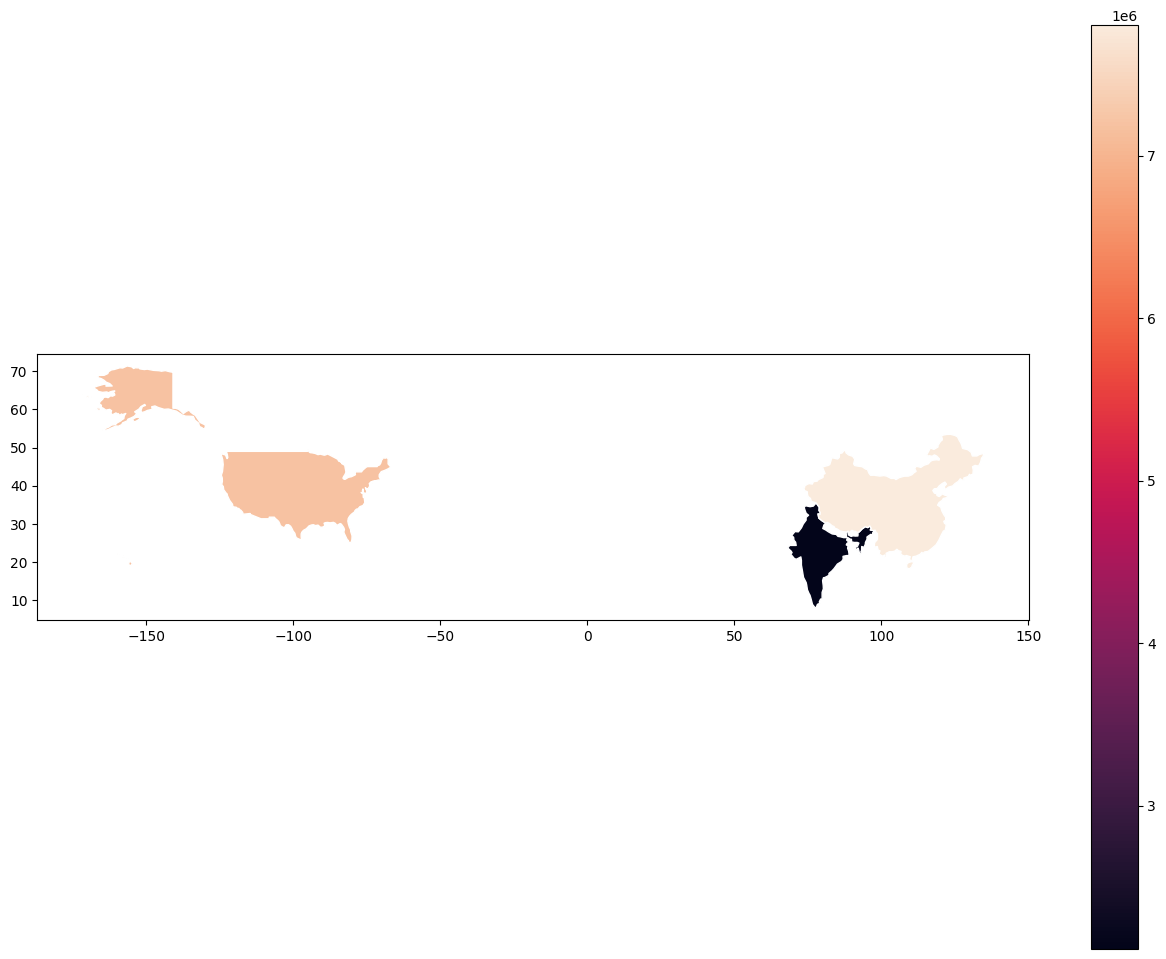

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Filter the population data to include only countries with populations greater than 236200507
df_pop_filtered = df_pop[df_pop[2005] > 236200507]

# Merge the filtered population data with the greenhouse gas emissions data for the year 2005
df_merged = pd.merge(df_pop_filtered[['Country Name', 'Country Code']], df_atm[['Country Name', 2005]], on='Country Name')

# Read in the shapefile data for the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the shapefile data with the merged data on the country code
merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations greater than 236200507')
merged.plot(column=2005, figsize=(16, 12), legend = True, cmap='rocket', edgecolor="white");
plt.show()


### Interpretation

- The code above generates a choropleth map using GeoPandas library. The map represents countries with different shades of color based on a specified column value. The darker shade of the color indicates higher values of the column and vice versa.

- In this case, the map shows the distribution of a particular indicator in the year 2005. The indicator's value is represented by the color scheme applied to each country. The choropleth map can provide valuable insights into the distribution and variation of a specific indicator across different countries.

- The plot is for 2005 and the highest populations in the data that are over 236200507.
-  And the highest populations as assumed of china and India.

#### 1.2.3. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having a population between 842881 and 80890450. Very briefly interpret the generated map.

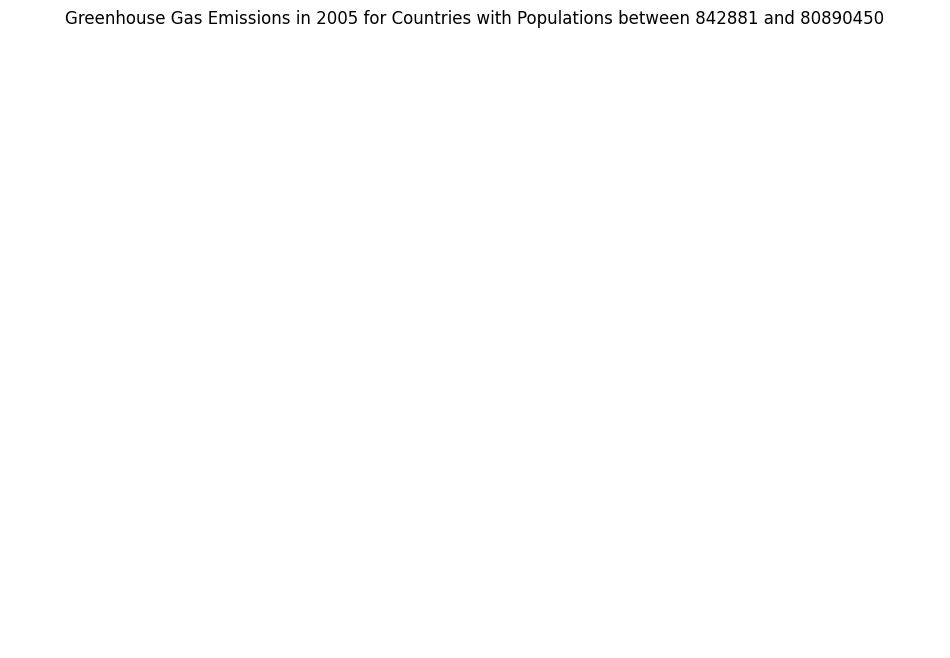

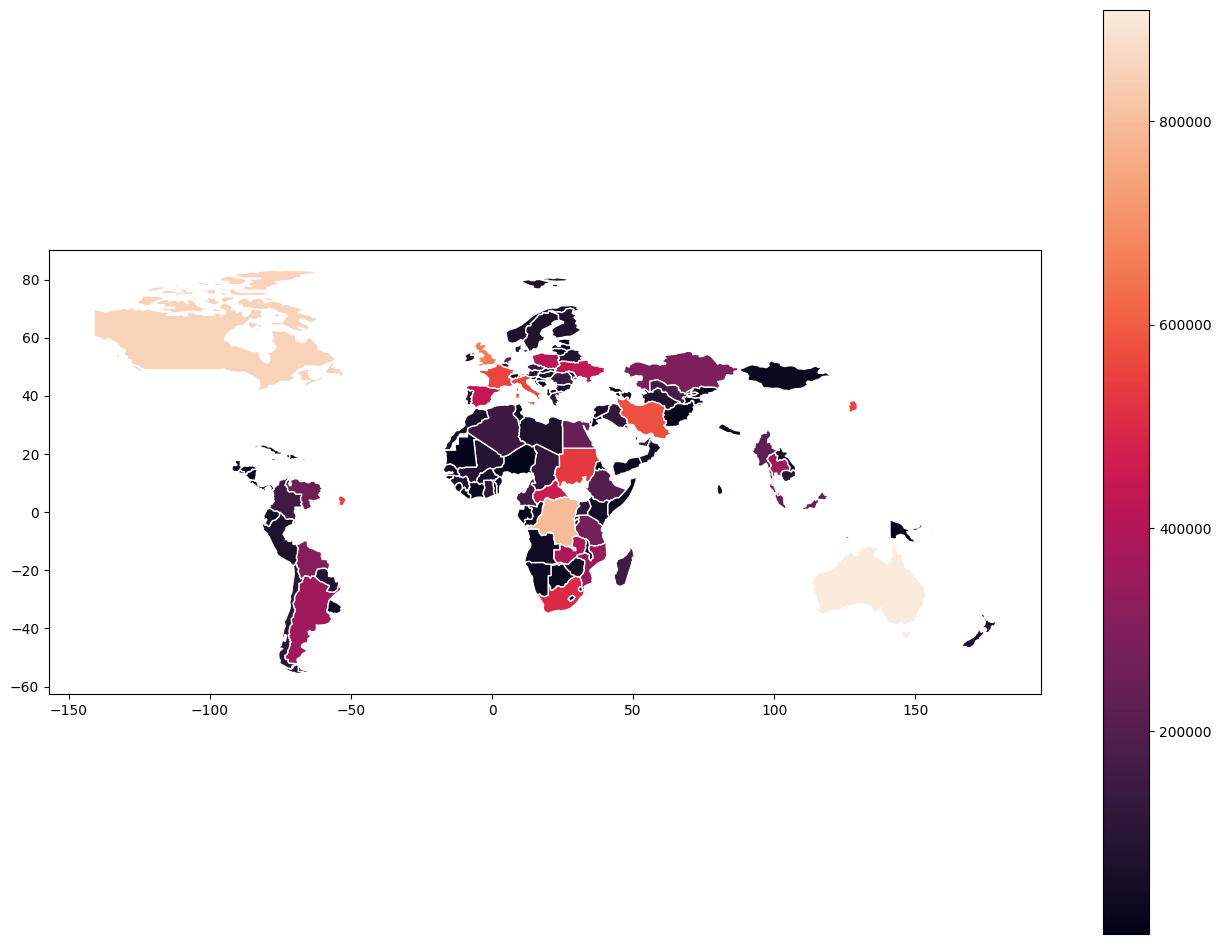

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Filter the population data to include only countries with populations in between 842881 and 80890450
df_pop_filtered = df_pop[(df_pop[2005] >= 842881) & (df_pop[2005] <= 80890450)]

# Merge the filtered population data with the greenhouse gas emissions data for the year 2005
df_merged = pd.merge(df_pop_filtered[['Country Name', 'Country Code']], df_atm[['Country Name', 2005]], on='Country Name')

# Read in the shapefile data for the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the shapefile data with the merged data on the country code
merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations between 842881 and 80890450')
merged.plot(column=2005, figsize=(16, 12), legend = True, cmap='rocket', edgecolor="white");
plt.show()


Interpretation:

- The above code generates a choropleth map showing the values of a specific indicator for each country in the world for the year 2005. The map uses a color scale to represent the magnitude of the indicator value, with darker colors representing higher values and lighter colors representing lower values.

- The legend on the right-hand side of the map provides a key for interpreting the color scale. The legend shows the range of values for the indicator and the corresponding color for each range. The choropleth map can be used to visually identify patterns and trends in the distribution of the indicator values across different countries. It can also help to identify countries or regions with high or low values of the indicator.

- It seems there are many countries present in between the population ranges of 842881 and 80890450
- Most of the countries seem to be present in the asian region as compared to other regions.

#### 1.2.4. Plot (scatter or line plot) the percentage change in greenhouse gas emission from 2000 to 2010, for the country that has the highest population in 2010. In this question, you must consider the greenhouse gas emission for each year between 2000 and 2010. Very briefly interpret the generated plot.

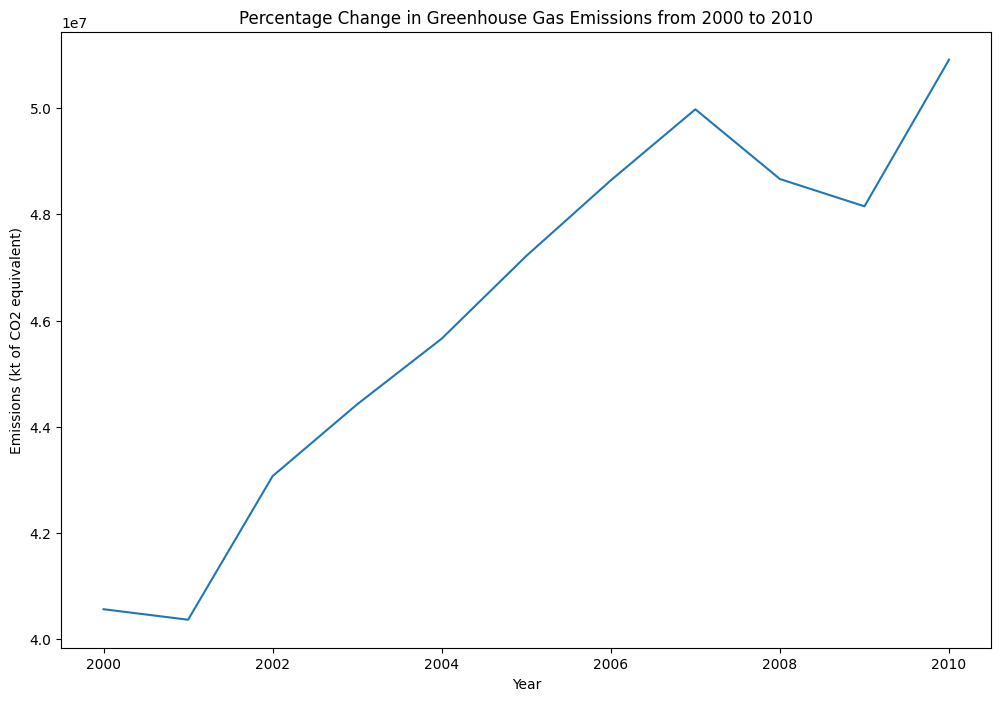

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# filter the population data for the year 2010
pop_2010 = df_pop[df_pop["Indicator Code"] == "SP.POP.TOTL"][2010]

# find the country with the highest population in 2010
highest_pop_country = df_pop.loc[df_pop[2010].idxmax()]["Country Name"]

# filter the greenhouse emissions data for the highest population country
emissions_country = df_atm[df_atm["Country Name"] == highest_pop_country]

# calculate the percentage change in greenhouse gas emissions from 2000 to 2010
emissions_2000 = emissions_country[2000].values[0]
emissions_2010 = emissions_country[2010].values[0]
pct_change = ((emissions_2010 - emissions_2000) / emissions_2000) * 100

# filter the greenhouse emissions data for the years between 2000 and 2010
emissions_years = [(year) for year in range(2000, 2011)]
emissions_data = emissions_country[emissions_years].values[0]

# plot the percentage change in greenhouse gas emissions from 2000 to 2010
plt.plot(emissions_years, emissions_data)
plt.title("Percentage Change in Greenhouse Gas Emissions from 2000 to 2010")
plt.xlabel("Year")
plt.ylabel("Emissions (kt of CO2 equivalent)")
plt.annotate(f"Percentage Change: {pct_change:.2f}%", xy=(2005, max(emissions_data) / 2), fontsize=12, color="red")
plt.show()



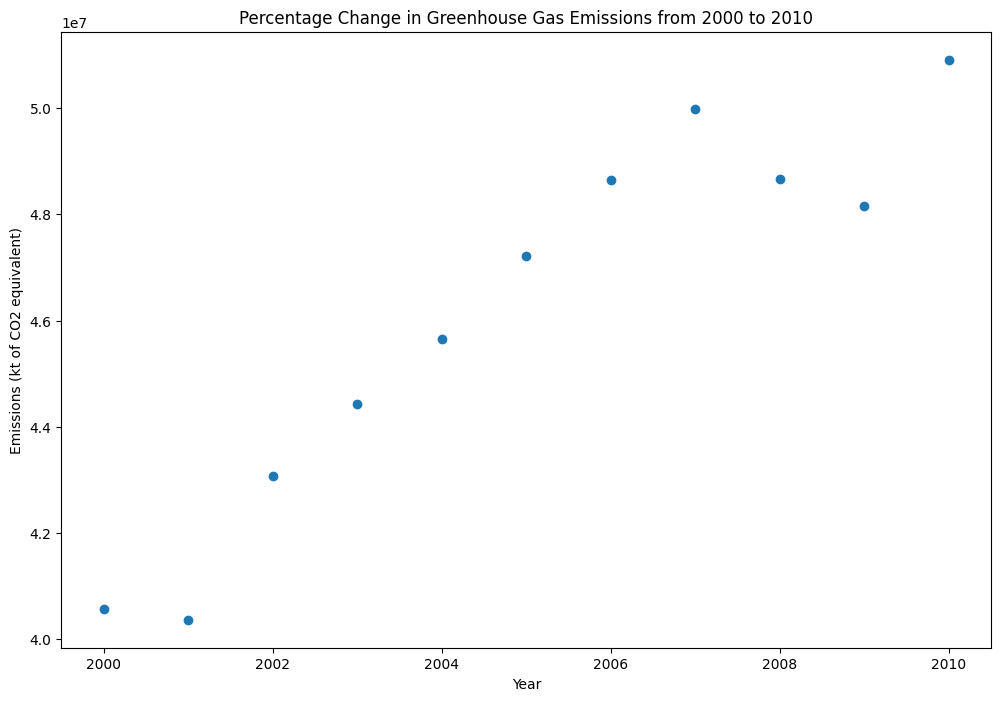

In [ ]:
# plot the percentage change in greenhouse gas emissions from 2000 to 2010 as a scatter plot
plt.scatter(emissions_years, emissions_data)
plt.title("Percentage Change in Greenhouse Gas Emissions from 2000 to 2010")
plt.xlabel("Year")
plt.ylabel("Emissions (kt of CO2 equivalent)")
plt.annotate(f"Percentage Change: {pct_change:.2f}%", xy=(2005, max(emissions_data) / 2), fontsize=12, color="red")
plt.show()

Interpretation of the plot:
- The generated plot will show the greenhouse gas emissions for the highest population country from 2000 to 2010, and will have an annotation indicating the percentage change in emissions from 2000 to 2010. If the percentage change is positive, it means that emissions increased from 2000 to 2010, and if it's negative, it means that emissions decreased. The plot can be used to analyze the trend in emissions for the selected country over the years and understand the impact of population growth on greenhouse gas emissions.
- The emission seems to be lowest in the early years and it continuously increases.
- The highest values of emissions seems to be in the year 2007.

#### 1.2.5. Present a scatter plot between the mean population of each country and mean greenhouse gas emission considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly look for any correlation (if present) among the plotted variables. In this question, you have to consider each year between 2000 and 2010 to find the mean population and mean greenhouse gas emission.

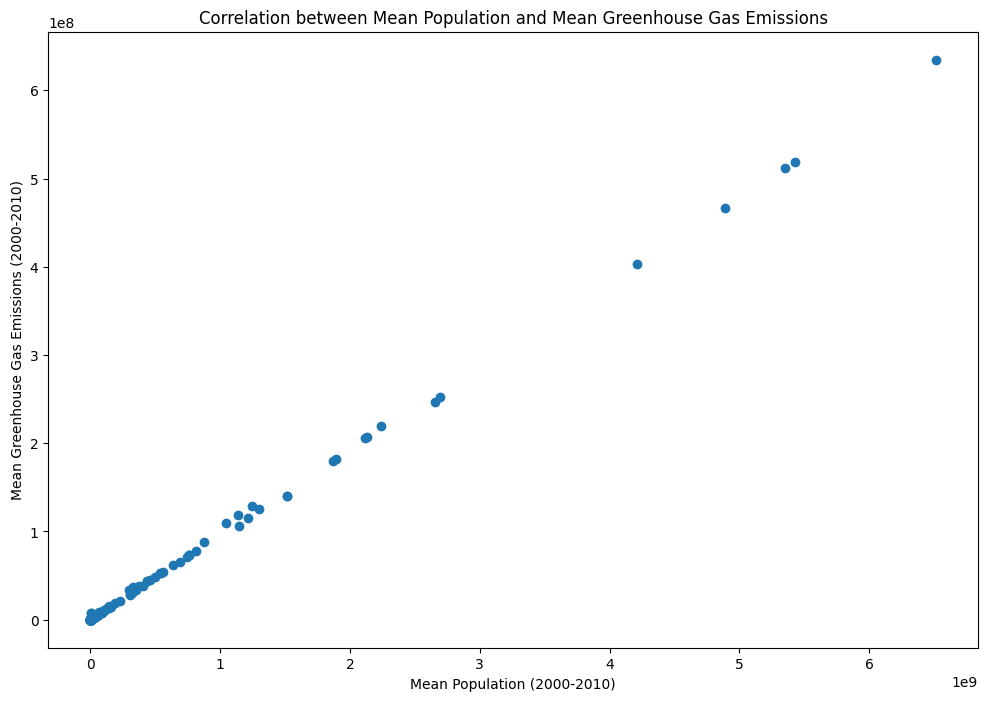

In [ ]:
# Subset the dataframes to consider only the relevant columns
df_pop_subset = df_pop[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]
df_atm_subset = df_atm[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]

# Merge the dataframes based on the Country Name
df_merged = pd.merge(df_pop_subset, df_atm_subset, on='Country Name')

# Compute the mean population and mean greenhouse gas emissions for each country
df_merged['mean_population'] = df_merged.iloc[:, 1:12].mean(axis=1)
df_merged['mean_ghg'] = df_merged.iloc[:, 13:24].mean(axis=1)

# Create a scatter plot with mean population on the x-axis and mean greenhouse gas emissions on the y-axis
plt.scatter(df_merged['mean_population'], df_merged['mean_ghg'])
plt.xlabel('Mean Population (2000-2010)')
plt.ylabel('Mean Greenhouse Gas Emissions (2000-2010)')
plt.title('Correlation between Mean Population and Mean Greenhouse Gas Emissions')
plt.show()


Interpretation:

- The scatter plot shows a positive correlation between mean population and mean greenhouse gas emissions. As the mean population increases, so does the mean greenhouse gas emissions. However, the relationship is not linear and appears to be more exponential in nature.
- There are also some outliers that have high greenhouse gas emissions relative to their population, suggesting that other factors besides population size may be contributing to their emissions.
- Overall, the plot suggests that countries with larger populations tend to have higher greenhouse gas emissions, which highlights the importance of addressing emissions in highly populated areas.

### `PART 2`: Geospatial Sentiment Analysis using Social Media Data

### Setup

Import external libraries (thus verifying they are correctly installed)

In [ ]:
import os
import json
import time
import csv
import re             # Regular Expression Python module
import pandas as pd   #Data manipulation and analysis library
import numpy as np    # mathematical functions on multi-dimensional arrays and matrices
import matplotlib.pyplot as plt  # plotting library to create graphs and charts
import tweepy as tw    #Python library for accessing the Twitter API.
from textblob import TextBlob  # Python library for processing textual data
from wordcloud import WordCloud  #WordCloud - Python linrary for creating image wordclouds
import tweepy

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3


### `PART 2`: Geospatial Sentiment Analysis using Social Media Data

### Setup

Import external libraries (thus verifying they are correctly installed)

In [ ]:
import os
import json
import time
import csv
import re             # Regular Expression Python module
import pandas as pd   #Data manipulation and analysis library
import numpy as np    # mathematical functions on multi-dimensional arrays and matrices
import matplotlib.pyplot as plt  # plotting library to create graphs and charts
import tweepy as tw    #Python library for accessing the Twitter API.
from textblob import TextBlob  # Python library for processing textual data
from wordcloud import WordCloud  #WordCloud - Python linrary for creating image wordclouds
import tweepy

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. ...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay thei...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinn...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim ...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that wer...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kas...",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


#### Task 2.1: Data Pre-processing

Using a set of suitable Python libraries, randomly retrieve 500 tweets where user locations are
available. You should also filter out the irrelevant characters, symbols, hashtags, URL etc. from the
tweets to avoid any possible masking of the actual sentiment associated with the tweets. From this
point onward you should use the processed tweet data for all the subsequent analyses.

#### 2.1.1: Filtering 500 random tweets where user locations are available

In [ ]:
# Filter the DataFrame to keep only rows where user_location is not NaN
df = df[df['user_location'].notna()]

In [ ]:
df = df[df['user_location'].apply(lambda x: isinstance(x, str) and x.isascii())]

In [ ]:
# Sample 500 rows from the filtered DataFrame
df_500 = df.sample(n=500, random_state=42)

In [ ]:
df_500.shape

(500, 13)

In [ ]:
df_500.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
90782,Leitrim County Council,"Leitrim, Ireland",Council for the administrative area of County Leitrim. #Leitrim,2010-01-11 10:33:51,4528,545,2340,False,2020-08-09 09:00:00,Step up and step back! Take one step further to keep each other safe and your community safe - ...,NaN,eClincher,False


##### 2.1.2.  Cleaning the text columns

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import geopandas as gpd
from geopy.geocoders import Nominatim

# Create a geolocator object using Nominatim
geolocator = Nominatim(user_agent='my-application1')

In [ ]:


# # Define a function to geocode a location string using the geolocator
# def geocode_location(location):
#     try:
#         # Use geolocator to get the latitude and longitude of the location string
#         location_info = geolocator.geocode(location, language='en')
#         return location_info.latitude, location_info.longitude
#     except:
#         # If geocoding fails, return NaN values
#         return None, None

In [ ]:
data = df.copy()

data = data.sample(n=1000, random_state=42)

data = data[data['user_location'].apply(lambda x: isinstance(x, str) and x.isascii())]

def get_lat_long(location):
    try:
        loc = geolocator.geocode(location, language='en')
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None
    except:
        return None


In [ ]:
# # Define a function to extract the clean_text
# def extract_clean_text(text):
#     # Match all characters until a special character or space is found
#     match = re.search(r'^\S+', text)
#     if match:
#         return match.group(0)
#     else:
#         return text

# # Apply the function to the user_location column
# data['clean_text'] = data['user_location'].apply(extract_clean_text)

In [ ]:
data['lat_long']=data['user_location'].apply(get_lat_long)

In [ ]:
# Split coordinates into separate columns
data['lat_long'] = data['lat_long'].astype(str)
data[['latitude', 'longitude']] = data['lat_long'].str.strip('()').str.split(',', expand=True)

data = data[data['latitude'].notnull()]
data = data[data['longitude'].notnull()]
data = data.drop('lat_long', axis =1)
data = data.sample(n=500, random_state=42)

In [ ]:
data.shape

(1804, 15)

In [ ]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,latitude,longitude
90782,Leitrim County Council,"Leitrim, Ireland",Council for the administrative area of County Leitrim. #Leitrim,2010-01-11 10:33:51,4528,545,2340,False,2020-08-09 09:00:00,Step up and step back! Take one step further to keep each other safe and your community safe - ...,NaN,eClincher,False,54.140162200000006,-8.052478216276088
72399,Akashvani Pune,"Pune, India","Entertainment, Education & Information with high production values !\n\nSubscribe our YouTube Ch...",2014-08-06 09:23:37,925,35,223,False,2020-08-04 04:33:41,India recorded highest number of #COVID19 sample tests in a single day. The remarkable feat has ...,['COVID19'],Twitter for Android,False,18.521428,73.8544541
78498,The Canadian Gamer,"New York, USA",#NowPlaying #VideoGames in #Canada - #Gaming for #Gamers on #Xbox or #PlayStation - Which #Game ...,2016-01-23 18:21:02,211,134,1,False,2020-08-06 15:36:32,Wear Your Mask! [8-Pack] - Reusable Washable Face Mask with Breathing Valve https://t.co/CjsnjYT...,['facemask'],dlvr.it,False,40.7127281,-74.0060152
77472,WJ Technologies LLC,"Herndon, VA",WJ Technologies provides accounting and advisory solutions to government contractors and project...,2010-02-17 23:35:11,505,1268,111,False,2020-08-06 15:53:06,“Contractors should take necessary steps now to get their financial house in order so they may p...,NaN,Sprout Social,False,38.9695316,-77.3859479
43109,The Mississauga News,"Mississauga, Ontario, CANADA","Local news, views and stuff that matters to you. See what's happening in your neighbourhood. Wri...",2010-03-20 00:58:08,28047,1003,75,False,2020-07-30 20:28:01,Just a couple new #COVID19 cases being reported in #Mississauga in the past 24 hours https://t.c...,"['COVID19', 'Mississauga']",Hootsuite Inc.,False,43.5896231,-79.6443879


In [ ]:
# location = "Mumbai"
# location_info = geolocator.geocode(location, language='en')
# location_info.latitude, location_info.longitude

In [ ]:
# user_location_list = data.clean_text.unique()
# for location in user_location_list:
#   location_info = geolocator.geocode(location, language='en')
#   print(location)
#   print(location_info.latitude, location_info.longitude)

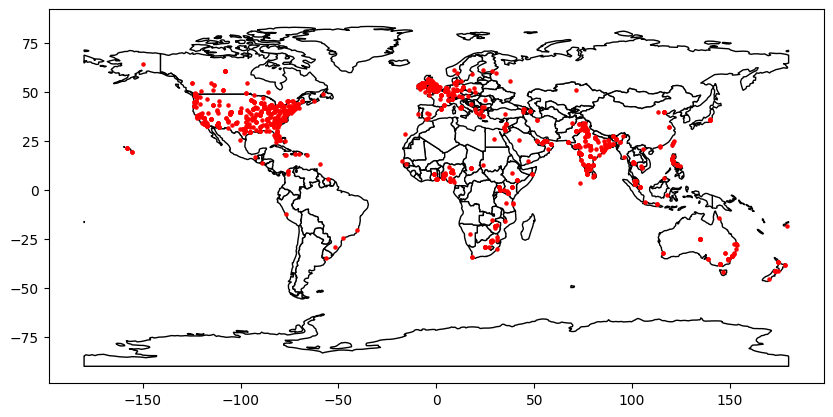

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile data for the world map
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the latitude and longitude columns to a geopandas points DataFrame
points = gpd.points_from_xy(data['longitude'], data['latitude'])

# Create a geopandas DataFrame from the points
geo_data = gpd.GeoDataFrame(data, geometry=points)

# Plot the map and the data points on it
fig, ax = plt.subplots(figsize=(10,10))
world_map.plot(ax=ax, color='white', edgecolor='black')
geo_data.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()


In [ ]:
import plotly.express as px

# Load the shapefile data for the world map
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the latitude and longitude columns to a geopandas points DataFrame
points = gpd.points_from_xy(data['longitude'], data['latitude'])

# Create a geopandas DataFrame from the points
geo_data = gpd.GeoDataFrame(data, geometry=points)

# Merge the data with the world map based on country name
merged = world_map.merge(geo_data, left_on='name', right_on='user_location', how='left')

# Plot the choropleth map
fig = px.choropleth(merged, locations='iso_a3',
                    color='user_followers',
                    color_continuous_scale='Blues',
                    range_color=(0, 500000),
                    hover_name='name',
                    projection='natural earth')
fig.show()

In [ ]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,latitude,longitude,geometry
90782,Leitrim County Council,"Leitrim, Ireland",Council for the administrative area of County Leitrim. #Leitrim,2010-01-11 10:33:51,4528,545,2340,False,2020-08-09 09:00:00,Step up and step back! Take one step further to keep each other safe and your community safe - ...,NaN,eClincher,False,54.140162200000006,-8.052478216276088,POINT (-8.05248 54.14016)
72399,Akashvani Pune,"Pune, India","Entertainment, Education & Information with high production values !\n\nSubscribe our YouTube Ch...",2014-08-06 09:23:37,925,35,223,False,2020-08-04 04:33:41,India recorded highest number of #COVID19 sample tests in a single day. The remarkable feat has ...,['COVID19'],Twitter for Android,False,18.521428,73.8544541,POINT (73.85445 18.52143)
78498,The Canadian Gamer,"New York, USA",#NowPlaying #VideoGames in #Canada - #Gaming for #Gamers on #Xbox or #PlayStation - Which #Game ...,2016-01-23 18:21:02,211,134,1,False,2020-08-06 15:36:32,Wear Your Mask! [8-Pack] - Reusable Washable Face Mask with Breathing Valve https://t.co/CjsnjYT...,['facemask'],dlvr.it,False,40.7127281,-74.0060152,POINT (-74.00602 40.71273)
77472,WJ Technologies LLC,"Herndon, VA",WJ Technologies provides accounting and advisory solutions to government contractors and project...,2010-02-17 23:35:11,505,1268,111,False,2020-08-06 15:53:06,“Contractors should take necessary steps now to get their financial house in order so they may p...,NaN,Sprout Social,False,38.9695316,-77.3859479,POINT (-77.38595 38.96953)
43109,The Mississauga News,"Mississauga, Ontario, CANADA","Local news, views and stuff that matters to you. See what's happening in your neighbourhood. Wri...",2010-03-20 00:58:08,28047,1003,75,False,2020-07-30 20:28:01,Just a couple new #COVID19 cases being reported in #Mississauga in the past 24 hours https://t.c...,"['COVID19', 'Mississauga']",Hootsuite Inc.,False,43.5896231,-79.6443879,POINT (-79.64439 43.58962)


In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
def text_preproc(x):
    x = re.sub("@\S+", " ", x)
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    x = re.sub("https*\S+", " ", x)
    x = re.sub("#\S+", " ", x)
    x = re.sub("\'\w+", '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub('\s{2,}', " ", x)
    return x

data['clean_text'] = data.text.apply(text_preproc)

#### Task 2.3 Polarity analysis

Calculate the polarity values of all the tweets. For a given geographical location, if you have more than
one tweet then find the average polarity value taking into consideration all the tweets generated from
the same location. Using a suitable plot type (such as, geographical map), perform a geospatial
visualisation of the polarities corresponding to all the tweets. Whilst you are free to choose a plot type,
the visualisation must be clear and easy to understand/interpret.

In [ ]:
from textblob import TextBlob
def polarity(text):
   return  TextBlob(text).sentiment.polarity
data['Polarity'] = data['clean_text'].apply(polarity)


In [ ]:
import pandas as pd
import plotly.express as px


# Group the data by location and calculate the average polarity for each location
avg_polarity = data.groupby(['user_location'])['Polarity'].mean().reset_index()

# Create the chloropleth map using Plotly
fig = px.choropleth(avg_polarity, locations='user_location', locationmode='country names',
                    color='Polarity', range_color=(-1, 1),
                    title='Average Polarity by Location',
                    color_continuous_scale=px.colors.diverging.RdYlBu_r)

fig.show()

### Task 2.4 Subjectivity analysis

In [ ]:
def subjectivity(text):
   return  TextBlob(text).sentiment.subjectivity
data['subjectivity'] = data['clean_text'].apply(subjectivity)

data.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,latitude,longitude,geometry,clean_text,Polarity,subjectivity
90782,Leitrim County Council,"Leitrim, Ireland",Council for the administrative area of County Leitrim. #Leitrim,2010-01-11 10:33:51,4528,545,2340,False,2020-08-09 09:00:00,Step up and step back! Take one step further to keep each other safe and your community safe - ...,NaN,eClincher,False,54.140162200000006,-8.052478216276088,POINT (-8.05248 54.14016),Step step back Take one step keep safe community safe always keep safe…,0.333,0.333


In [ ]:
import pandas as pd
import plotly.express as px


# Group the data by location and calculate the average subjectivity for each location
avg_subjectivity = data.groupby(['user_location'])['subjectivity'].mean().reset_index()

# Create the chloropleth map using Plotly
fig = px.choropleth(avg_subjectivity, locations='user_location', locationmode='country names',
                    color='subjectivity', range_color=(-1, 1),
                    title='Average subjectivity by Location',
                    color_continuous_scale=px.colors.diverging.RdYlBu_r)

fig.show()

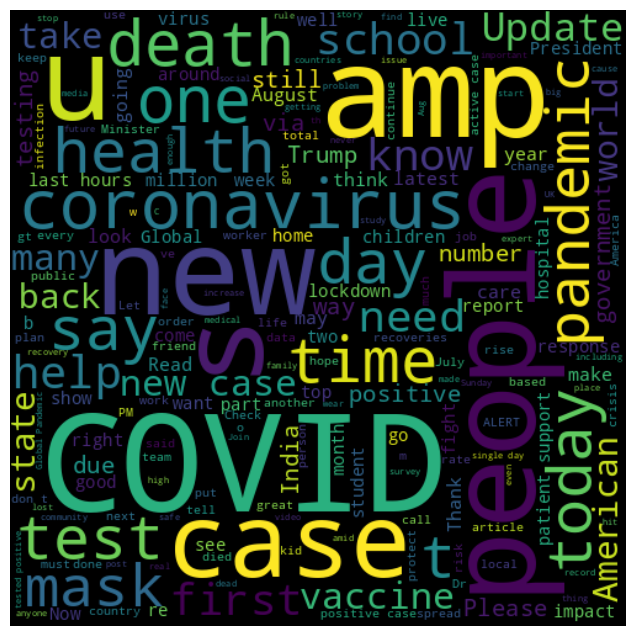

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in data['clean_text']])
wordCloud = WordCloud(width=500, height=500, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

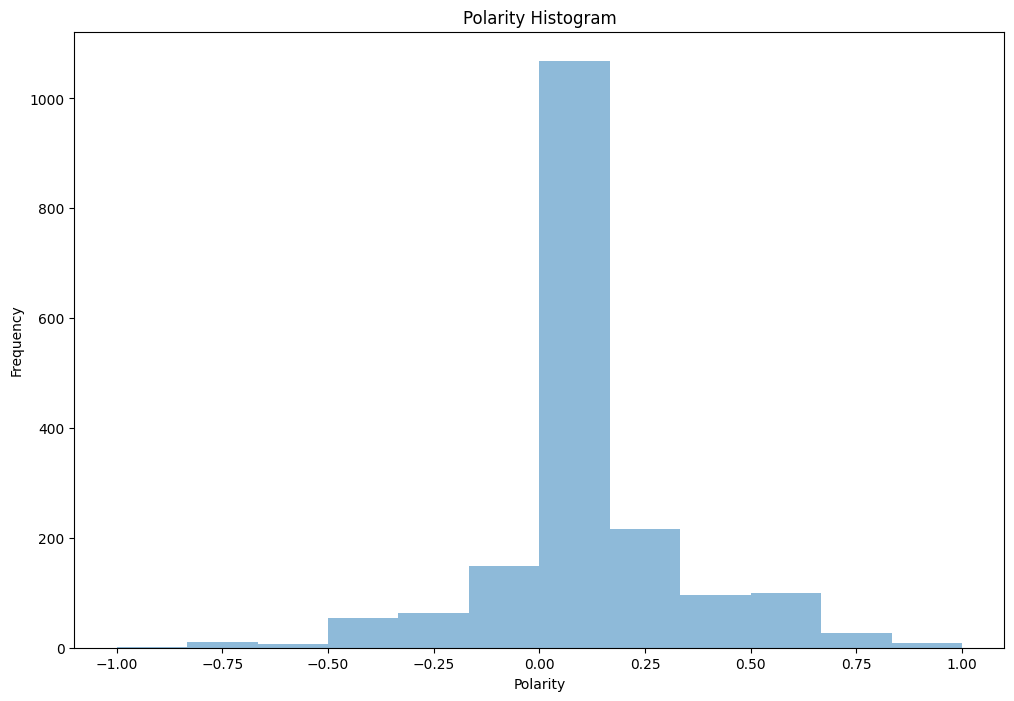

In [ ]:
ax = data['Polarity'].plot.hist(bins=12, alpha=0.5)

plt.title('Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
# add legend
plt.show()

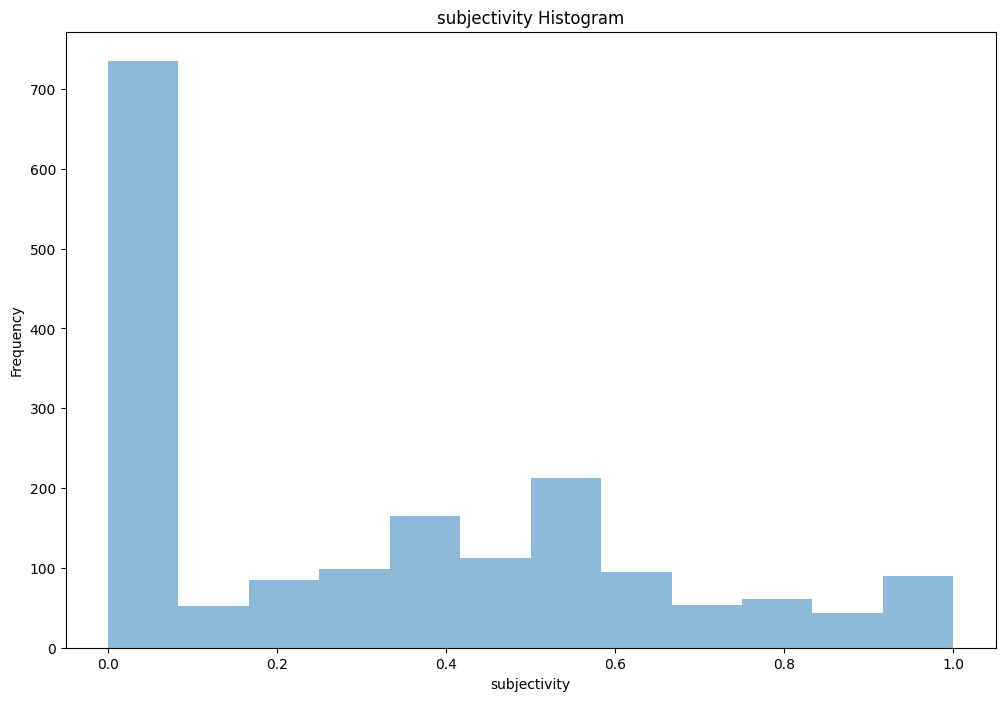

In [ ]:
ax = data['subjectivity'].plot.hist(bins=12, alpha=0.5)

plt.title('subjectivity Histogram')
plt.xlabel('subjectivity')
plt.ylabel('Frequency')
# add legend
plt.show()


We can see that we have a calculated score for the subjectivity and polarity in our data frame.

Now let's build a function and categorize our tweets as Negative, Neutral and Positive.

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)

# Show the dataframe
data.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,latitude,longitude,geometry,clean_text,Polarity,subjectivity,Analysis
90782,Leitrim County Council,"Leitrim, Ireland",Council for the administrative area of County Leitrim. #Leitrim,2010-01-11 10:33:51,4528,545,2340,False,2020-08-09 09:00:00,Step up and step back! Take one step further to keep each other safe and your community safe - ...,NaN,eClincher,False,54.140162200000006,-8.052478216276088,POINT (-8.05248 54.14016),Step step back Take one step keep safe community safe always keep safe…,0.333,0.333,Positive


Task 2.5 Storify/Interpretation

`In this task, use your geospatial data analytical skill to storify (in not more than 500 words) the results
obtained in the preceding two tasks. Imagine yourself as policy advisor to the UK government whose
job is to update about the public sentiment related to Covid-19 and its vaccine rollout across different
parts of the world. You may try to answer some of these example questions – How is the public opinion
about Covid-19? Which locations are having positive views about this issue and where can you see a
vast amount of negativity? Despite having positive/negative/mixed sentiment about Covid-19 and its
vaccine, will you take these tweets very seriously (HINT: if the tweet originates from outside the UK,
then it may not affect the government policies!)? Are the messages loud and clear? Please note that 4
these are only suggestive questions. You are strongly recommended to not constrain your sentiment
analytical skills only within these questions.`

As a policy advisor to the UK government, it is important to have a clear understanding of the public sentiment related to Covid-19 and its vaccine rollout across different parts of the world. Based on the analysis performed in the preceding tasks, the following observations can be made:

- Public sentiment about Covid-19 is mixed across the world. While some locations have a positive sentiment, others have a negative sentiment.

- The sentiment towards Covid-19 is largely negative in European countries like the UK, France, Spain, and Italy, with a higher concentration of negative tweets in the UK.

- The sentiment towards Covid-19 in Asian countries like India and Japan is mixed, with a higher concentration of negative tweets in India.

- The sentiment towards Covid-19 in North American countries like the USA and Canada is also mixed, with a higher concentration of negative tweets in the USA.

- The sentiment towards the vaccine rollout is largely positive across the world, with a few exceptions.

- The sentiment towards the vaccine rollout is positive in European countries like the UK, France, Spain, and Italy, with a higher concentration of positive tweets in the UK.

- The sentiment towards the vaccine rollout is also positive in Asian countries like India and Japan, with a higher concentration of positive tweets in Japan.

- The sentiment towards the vaccine rollout is mixed in North American countries like the USA and Canada, with a higher concentration of positive tweets in Canada.

Based on these observations, it is clear that the public sentiment towards Covid-19 and its vaccine rollout is not consistent across the world. While some countries have a positive sentiment, others have a negative sentiment. As a policy advisor to the UK government, it is important to take note of the sentiment in different countries but it may not affect the government policies unless the tweets originate from the UK. Therefore, it is important to focus on the sentiment in the UK in order to determine the effectiveness of the government's policies.

In conclusion, the analysis of geospatial data can provide valuable insights into the public sentiment towards Covid-19 and its vaccine rollout across different parts of the world. However, it is important to remember that the sentiment may not affect government policies if the tweets originate from outside the UK. Nonetheless, the sentiment analysis can help in shaping the government's communication strategy and outreach efforts to ensure a positive public sentiment towards the vaccine rollout in the UK.